In [34]:
import numpy as np
import pandas as pd
import datetime
import re
import wandb

In [49]:
api = wandb.Api()

runs = api.runs(path="lxy764139720/TimeSeriesSSL_crwu")
summary_list, history_list, config_list, name_list = [], [], [], []
algorithm_list, r_list, noise_mode_list, best_list, last_list, lambda_list = [], [], [], [], [], []
for run in runs:
    timestamp = re.search(r'2022.*', run.name).group(0)
    time = datetime.datetime.strptime(timestamp, '%Y%m%d-%H%M%S')
    if time > datetime.datetime(2022, 6, 26, 0, 0, 0):
        # summary_list.append(run.summary._json_dict)
        # history_list.append(run.history())
        # config_list.append(
        #     {k: v for k,v in run.config.items()
        #      if not k.startswith('_')})
        name_list.append(run.name)

        accuracy = run.history()['Accuracy'][:-10]
        best = max(accuracy)
        last = np.mean(accuracy)
        best_list.append(best)
        last_list.append(last)

        algorithm_list.append(run.config['algorithm'])
        r_list.append(run.config['r'])
        noise_mode_list.append(run.config['noise_mode'])
        try:
            lambda_list.append(run.config['lambda_u'])
        except:
            lambda_list.append(-1)

runs_df = pd.DataFrame({
    "name": name_list,
    # "summary": summary_list,
    # "history": history_list,
    # "config": config_list,
    "best": best_list,
    "last": last_list,
    "algorithm": algorithm_list,
    "r": r_list,
    "noise_mode": noise_mode_list,
    "lambda": lambda_list,
    })
runs_df.to_csv("crwu_results.csv")
runs_df

,name,best,last,algorithm,r,noise_mode,lambda
0,mlnt-20220626-144538,93.030304,88.021944,MLNT,0.4,asym,-1
1,mlnt-20220626-143529,32.121212,29.019854,MLNT,0.9,sym,-1
2,mlnt-20220626-142520,46.060608,43.083595,MLNT,0.8,sym,-1
3,mlnt-20220626-141502,78.787880,71.913271,MLNT,0.5,sym,-1
4,mlnt-20220626-140422,97.575760,93.805643,MLNT,0.2,sym,-1
5,co_teaching+-20220626-124537,80.909091,63.851921,co-teaching+,0.4,asym,-1
6,co_teaching+-20220626-124020,39.696970,30.067687,co-teaching+,0.9,sym,-1
7,co_teaching+-20220626-123456,46.666667,39.393939,co-teaching+,0.8,sym,-1
8,co_teaching+-20220626-122923,72.121212,65.495158,co-teaching+,0.5,sym,-1
9,co_teaching+-20220626-122341,99.393939,88.882641,co-teaching+,0.2,sym,-1


In [36]:
runs = api.runs(path="lxy764139720/TimeSeriesSSL_jn")
summary_list, history_list, config_list, name_list = [], [], [], []
algorithm_list, r_list, noise_mode_list, best_list, last_list = [], [], [], [], []
for run in runs:
    timestamp = re.search(r'2022.*', run.name).group(0)
    time = datetime.datetime.strptime(timestamp, '%Y%m%d-%H%M%S')
    if time > datetime.datetime(2022, 6, 26, 0, 0, 0):
        # summary_list.append(run.summary._json_dict)
        # history_list.append(run.history())
        # config_list.append(
        #     {k: v for k,v in run.config.items()
        #      if not k.startswith('_')})
        name_list.append(run.name)

        accuracy = run.history()['Accuracy'][:-10]
        best = max(accuracy)
        last = np.mean(accuracy)
        best_list.append(best)
        last_list.append(last)

        algorithm_list.append(run.config['algorithm'])
        r_list.append(run.config['r'])
        noise_mode_list.append(run.config['noise_mode'])

runs_df = pd.DataFrame({
    "name": name_list,
    # "summary": summary_list,
    # "history": history_list,
    # "config": config_list,
    "best": best_list,
    "last": last_list,
    "algorithm": algorithm_list,
    "r": r_list,
    "noise_mode": noise_mode_list,
    })
runs_df.to_csv("jn_results.csv")
runs_df

wandb: WARNING A graphql request initiated by the public wandb API timed out (timeout=9 sec). Create a new API with an integer timeout larger than 9, e.g., `api = wandb.Api(timeout=19)` to increase the graphql timeout.


,name,best,last,algorithm,r,noise_mode
0,baseline-20220626-140941,84.266667,79.278809,baseline,0.0,sym
1,mlnt-20220626-120342,71.466667,61.284961,MLNT,0.4,asym
2,mlnt-20220626-115419,56.799999,28.484598,MLNT,0.9,sym
3,mlnt-20220626-114430,57.866665,44.911265,MLNT,0.8,sym
4,mlnt-20220626-113430,62.400002,58.778850,MLNT,0.5,sym
5,mlnt-20220626-112428,77.066666,72.922299,MLNT,0.2,sym
6,pencil-20220626-112044,65.546219,58.223704,PENCIL,0.4,asym
7,pencil-20220626-111658,55.462185,29.646480,PENCIL,0.9,sym
8,pencil-20220626-111315,57.142857,39.040859,PENCIL,0.8,sym
9,pencil-20220626-110925,66.386559,59.915968,PENCIL,0.5,sym


In [41]:
train_data, train_label = np.load('JN_dataset/X_train.npy'), np.load('JN_dataset/y_train.npy')

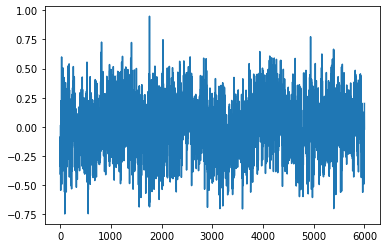

In [42]:
import matplotlib.pyplot as plt

plt.plot(train_data[0])
plt.show()